Given that $F(x)$ is a product of sine terms where each argument is uniformly distributed between 0 and $2\pi$, we want to compute the second moment of $F(x) \sin(p)$. Let:

$$
F(x) = \prod_{i=1}^{n} \sin(x_i),
$$
where each $x_i$ is uniformly distributed on $[0, 2\pi]$. We are interested in:

$$
\mathbb{E}[(F(x) \sin(p))^2].
$$

### Expanding the Second Moment
$$
\mathbb{E}[(F(x) \sin(p))^2] = \mathbb{E}[F(x)^2] \cdot \mathbb{E}[\sin^2(p)].
$$

### Expectation of $\sin^2(p)$
For a uniform random variable $p \in [0, 2\pi]$, the expectation of $\sin^2(p)$ is:

$$
\mathbb{E}[\sin^2(p)] = \int_{0}^{2\pi} \sin^2(p) \frac{dp}{2\pi}.
$$

Using the identity $\sin^2(p) = \frac{1 - \cos(2p)}{2}$, this becomes:

$$
\mathbb{E}[\sin^2(p)] = \int_{0}^{2\pi} \frac{1 - \cos(2p)}{2} \frac{dp}{2\pi} = \frac{1}{2}.
$$

### Expectation of $F(x)^2$
$$
F(x)^2 = \prod_{i=1}^{n} \sin^2(x_i).
$$

For independent $x_i$ uniformly distributed on $[0, 2\pi]$, the expectation is:

$$
\mathbb{E}[F(x)^2] = \prod_{i=1}^{n} \mathbb{E}[\sin^2(x_i)].
$$

Since $\mathbb{E}[\sin^2(x_i)] = \frac{1}{2}$, we have:

$$
\mathbb{E}[F(x)^2] = \left(\frac{1}{2}\right)^n.
$$

### Final Expression
Substituting these results, the second moment is:

$$
\mathbb{E}[(F(x) \sin(p))^2] = \mathbb{E}[F(x)^2] \cdot \mathbb{E}[\sin^2(p)] = \left(\frac{1}{2}\right)^n \cdot \frac{1}{2}.
$$

$$
\mathbb{E}[(F(x) \sin(p))^2] = \frac{1}{2^{n+1}}.
$$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

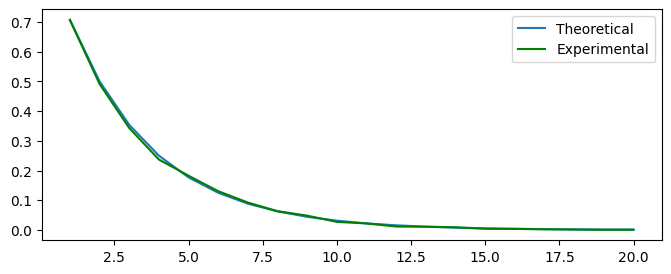

In [32]:
def generate_coefficients(n_shot, n_coefficient):
    angles = 2*np.pi*np.random.rand(n_shot, n_coefficient)
    values = np.prod(np.sin(angles), axis=1)
    return np.std(values)
    
def theoretical(n_coefficient):
    return np.sqrt((.5)**n_coefficient)

X = np.arange(20) + 1

exper_mean = []
exper_std  = []
for x in X:
    std = generate_coefficients(1000, x)
    exper_std.append(std)

exper_mean, exper_std = np.array(exper_mean), np.array(exper_std)

plt.figure(figsize=(8,3))
plt.plot(X, theoretical(X), label="Theoretical")
# plt.fill_between(X, exper_mean-exper_std, exper_mean+exper_std, alpha=0.2, color="green")
plt.plot(X, exper_std, label="Experimental", color="green")
plt.legend()
